Домашняя работа №1. Каменев Владислав Валерьевич М3437. Вариант №76

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
k = 2 + 76 * 0.1
phi = (1 + np.sqrt(5)) / 2
epsilon = 1e-6
counter = 0
def f(x):
    global counter
    counter += 1
    return np.exp(np.sqrt(x)) + k * np.exp(-k * x)

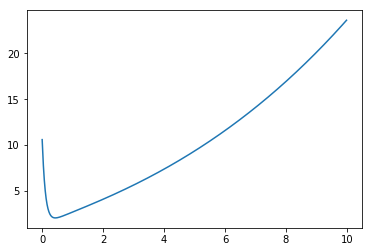

In [96]:
xs = [i / 100 for i in range(0, 10 * 100)]
fs = [f(i) for i in xs]
plt.plot(xs, fs)
plt.show()


Нарисовали график функции. Будем искать минимум на отрезке [0,2]

In [97]:
a, b = 0, 2

Метод сканирования. Используем К равным 100

In [98]:
def scan(a, b, k, f):
    currMinimum = f(a)
    currX = a
    for i in range(k):
        temp = a + (i+1)*(b-a)/k
        y = f(temp)
        if (y < currMinimum):
            currMinimum = y
            currX = temp
    return currX

In [99]:
x = scan(a, b, 100, f)
print("Метод сканирования.\nМинимум {} при x = {}.\nКоличество вычислений функции: {}".format(f(x), x, counter - 1))
counter = 0

Метод сканирования.
Минимум 2.0817798312032347 при x = 0.44.
Количество вычислений функции: 1101


Метод дихотомии.

In [100]:
def dixotonomy(a, b, f):
    currA = a
    currB = b
    while currB - currA > epsilon:
        currentX = (currA + currB) / 2
        F1 = f(currentX - epsilon)
        F2 = f(currentX + epsilon)
        if (F1 < F2):
            currB = currentX
        else:
            currA = currentX
    return (currB + currA) / 2

In [101]:
x = dixotonomy(a, b, f)
print("Метод дихотомии.\nМинимум {} при x = {}.\nКоличество вычислений функции: {}".format(f(x), x, counter - 1))
counter = 0

Метод дихотомии.
Минимум 2.081270212982435 при x = 0.43118906021118164.
Количество вычислений функции: 42


Метод золотого сечения.

In [102]:
def golden(a, b, f):
    while np.abs(f(b) - f(a)) > epsilon:
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        if f(x1) >= f(x2):
            a = x1
        else:
            b = x2
    return (a + b) / 2

In [103]:
x = golden(a, b, f)
print("Метод золотого сечения.\nМинимум {} при x = {}.\nКоличество вычислений функции: {}".format(f(x), x, counter - 1))

Метод золотого сечения.
Минимум 2.0812702141777826 при x = 0.43120282763858997.
Количество вычислений функции: 62


Метод Фибоначчи

In [141]:
# Задаем последовательность Фибоначчи
fib_sequence = [1,1]
for i in range(50):
    fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    
# Найдем начальное N
epsilon = 0.005
check = (b-a)/epsilon
n = 0
for i, fib in enumerate(fib_sequence):
    if fib > check:
        n = i - 2
        break
print("Для epsilon = {}, n будет {}".format(epsilon, n))

Для epsilon = 0.005, n будет 12


In [156]:
def fibonacci(a, b, f):
    global n
    fc = 0
    fd = 0
    c = a + (b - a) * fib_sequence[n] / fib_sequence[n + 2]
    d = a + (b - a) * fib_sequence[n + 1] / fib_sequence[n + 2]
    fc = f(c)
    fd = f(d)
    for i in range(1, n + 1):
        if fc < fd:
            b = d
            d = c
            if (i == n):
                break
            c = a + (b - a) * fib_sequence[n - i] / fib_sequence[n + 2 - i]
            fd = fc
            fc = f(c)
        else:
            a = c
            c = d
            if (i == n):
                break
            d = a + (b - a) * fib_sequence[n + 1 - i] / fib_sequence[n + 2 - i]
            fc = fd
            fd = f(d)
    return (a + b) / 2

In [157]:
x = fibonacci(a, b, f)
print("Метод Фибоначчи.\nМинимум {} при x = {}.\nКоличество вычислений функции: {}".format(f(x), x, counter - 1))
counter = 0

Метод Фибоначчи.
Минимум 2.0812873607271345 при x = 0.43278688524590164.
Количество вычислений функции: 13
